## 甘州图灵封神榜 2024-06-03 上榜数据分析

In [1]:
from IPython.display import Markdown, display
import pywencai
import pandas as pd
from datetime import datetime
import akshare as ak

import warnings

# 忽略所有警告信息
warnings.filterwarnings('ignore')

current_time = datetime.now().strftime("%Y-%m-%d %H:%M")

In [11]:
data_type ={
    '上榜时间': str, 
    '股票代码': str, 
    '股票名称': str, 
    '现价': float, 
    '涨跌幅': float, 
    '成交额': float
  }

df = pd.read_csv("leaderboard.csv",dtype=data_type)
df['date'] = pd.to_datetime(df['上榜时间'])
df = df.set_index('date')
df
df_all=df

In [13]:
# 按'股票代码'分组并计算累计计数
df['cumcount'] = df.groupby('股票代码').cumcount()

# 筛选出每个股票代码第一次上榜的记录（cumcount为0）
df_first_occurrence = df[df['cumcount'] == 0]

# 删除辅助列'cumcount'
df_first_occurrence.drop(columns=['cumcount'], inplace=True)

# 显示结果
# print(df_first_occurrence)
print(df_first_occurrence.shape)

(17, 8)


In [14]:
# 获取沪深A股的今日OHLC数据
def get_today_ohlc(stock_code):
    symbol = f"sh{stock_code}" if stock_code[:1] == '6' else f"sz{stock_code}"
    start_date: str = "20240530"
    stock_zh_a_daily_df = ak.stock_zh_a_daily(symbol=symbol,start_date=start_date)
    if stock_zh_a_daily_df.empty:
        return pd.Series([None] * 4, index=['open', 'high', 'low', 'close'])
    else:
        return stock_zh_a_daily_df.iloc[-1]

# 使用apply函数简化循环，并确保返回的Series长度与DataFrame行数匹配
ohlc_columns = ['open', 'high', 'low', 'close']
df = df_first_occurrence
df = df.apply(lambda row: get_today_ohlc(row['股票代码']), axis=1)[ohlc_columns]
# print(df)
df_first_occurrence = pd.concat([df_first_occurrence, df], axis=1)
# 显示更新后的DataFrame
print(df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅', 'open', 'high', 'low', 'close']])

                       股票代码  股票名称     现价    涨跌幅   open   high    low  close
date                                                                       
2024-06-03 10:03:36  600171  上海贝岭  16.98   1.98  16.00  17.25  15.83  16.78
2024-06-03 10:03:36  300458  全志科技  21.62   4.19  20.66  21.88  20.48  21.46
2024-06-03 10:03:36  300408  三环集团  29.67   1.99  29.25  29.75  28.97  29.42
2024-06-03 10:03:36  601919  中远海控  15.92   5.85  15.44  16.19  15.41  16.06
2024-06-03 10:03:36  300661  圣邦股份  79.45   2.42  77.25  79.95  77.25  78.95
2024-06-03 10:13:37  600161  天坛生物  30.47   7.52  28.76  30.55  28.43  30.07
2024-06-03 10:13:37  002938  鹏鼎控股  30.28   1.27  29.69  30.76  29.58  30.19
2024-06-03 10:13:37  300502   新易盛  93.17   7.43  88.00  96.99  87.90  95.35
2024-06-03 10:18:12  002463  沪电股份  33.13   6.02  31.30  34.28  31.30  33.45
2024-06-03 10:32:24  002916  深南电路  97.33   8.23  90.01  97.38  90.01  93.90
2024-06-03 10:32:24  603986  兆易创新  86.82   4.46  84.01  87.02  83.50  86.17
2024-06-03 1

### 计算每笔交易的日收益率

In [15]:
df_first_occurrence['日收益率'] =round(100 * (df_first_occurrence['close'] - df_first_occurrence['现价']) /
                                    df_first_occurrence['现价'],2) 
df = df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅',  'close','日收益率']]


def create_markdown_link(row):
    stock_code = row['股票代码']
    stock_name = row['股票名称']
    # 构建Markdown超链接字符串
    link = f"[{stock_name}](https://www.iwencai.com/unifiedwap/result?w={stock_code}&querytype=stock)"
    return link

# 使用apply函数为股票名称添加Markdown超链接
df['股票名称'] = df.apply(lambda row: create_markdown_link(row), axis=1)
display(Markdown(df.to_markdown()))


| date                |   股票代码 | 股票名称                                                                       |   现价 |   涨跌幅 |   close |   日收益率 |
|:--------------------|-----------:|:-------------------------------------------------------------------------------|-------:|---------:|--------:|-----------:|
| 2024-06-03 10:03:36 |     600171 | [上海贝岭](https://www.iwencai.com/unifiedwap/result?w=600171&querytype=stock) |  16.98 |     1.98 |   16.78 |      -1.18 |
| 2024-06-03 10:03:36 |     300458 | [全志科技](https://www.iwencai.com/unifiedwap/result?w=300458&querytype=stock) |  21.62 |     4.19 |   21.46 |      -0.74 |
| 2024-06-03 10:03:36 |     300408 | [三环集团](https://www.iwencai.com/unifiedwap/result?w=300408&querytype=stock) |  29.67 |     1.99 |   29.42 |      -0.84 |
| 2024-06-03 10:03:36 |     601919 | [中远海控](https://www.iwencai.com/unifiedwap/result?w=601919&querytype=stock) |  15.92 |     5.85 |   16.06 |       0.88 |
| 2024-06-03 10:03:36 |     300661 | [圣邦股份](https://www.iwencai.com/unifiedwap/result?w=300661&querytype=stock) |  79.45 |     2.42 |   78.95 |      -0.63 |
| 2024-06-03 10:13:37 |     600161 | [天坛生物](https://www.iwencai.com/unifiedwap/result?w=600161&querytype=stock) |  30.47 |     7.52 |   30.07 |      -1.31 |
| 2024-06-03 10:13:37 |     002938 | [鹏鼎控股](https://www.iwencai.com/unifiedwap/result?w=002938&querytype=stock) |  30.28 |     1.27 |   30.19 |      -0.3  |
| 2024-06-03 10:13:37 |     300502 | [新易盛](https://www.iwencai.com/unifiedwap/result?w=300502&querytype=stock)   |  93.17 |     7.43 |   95.35 |       2.34 |
| 2024-06-03 10:18:12 |     002463 | [沪电股份](https://www.iwencai.com/unifiedwap/result?w=002463&querytype=stock) |  33.13 |     6.02 |   33.45 |       0.97 |
| 2024-06-03 10:32:24 |     002916 | [深南电路](https://www.iwencai.com/unifiedwap/result?w=002916&querytype=stock) |  97.33 |     8.23 |   93.9  |      -3.52 |
| 2024-06-03 10:32:24 |     603986 | [兆易创新](https://www.iwencai.com/unifiedwap/result?w=603986&querytype=stock) |  86.82 |     4.46 |   86.17 |      -0.75 |
| 2024-06-03 10:54:31 |     600183 | [生益科技](https://www.iwencai.com/unifiedwap/result?w=600183&querytype=stock) |  20.59 |     4.1  |   20.17 |      -2.04 |
| 2024-06-03 11:07:44 |     300814 | [中富电路](https://www.iwencai.com/unifiedwap/result?w=300814&querytype=stock) |  34.2  |    17.12 |   32.51 |      -4.94 |
| 2024-06-03 15:36:48 |     300433 | [蓝思科技](https://www.iwencai.com/unifiedwap/result?w=300433&querytype=stock) |  15.52 |     1.44 |   15.52 |       0    |
| 2024-06-03 15:36:48 |     300647 | [超频三](https://www.iwencai.com/unifiedwap/result?w=300647&querytype=stock)   |   6.38 |    13.52 |    6.38 |       0    |
| 2024-06-03 15:36:48 |     301329 | [信音电子](https://www.iwencai.com/unifiedwap/result?w=301329&querytype=stock) |  23.92 |     1.7  |   23.92 |       0    |
| 2024-06-03 15:36:48 |     603890 | [春秋电子](https://www.iwencai.com/unifiedwap/result?w=603890&querytype=stock) |  11.45 |     6.51 |   11.45 |       0    |

### 交易情况统计

In [16]:
# 筛选出盈利和亏损的股票
df_profit = df_first_occurrence[df_first_occurrence['close'] > df_first_occurrence['现价']]
df_loss = df_first_occurrence[df_first_occurrence['close'] < df_first_occurrence['现价']]

# 计算胜率和亏率
total_trades = len(df_first_occurrence)
profit_trades = len(df_profit)
loss_trades = len(df_loss)

win_rate = profit_trades / total_trades
loss_rate = loss_trades / total_trades

print("总交易次数: ", total_trades)
print("胜次数: ", profit_trades)
print("亏次数: ", )
print(f"胜率: {win_rate:.2f}")
print(f"亏率: {loss_rate:.2f}")


# 计算总成本和总收益
total_cost = df_first_occurrence['现价'].sum()
total_revenue = df_first_occurrence['close'].sum()

# 计算总体收益率
overall_return = ((total_revenue - total_cost) / total_cost) * 100

print(f"当日浮盈: {overall_return:.2f}%")

总交易次数:  17
胜次数:  3
亏次数: 
胜率: 0.18
亏率: 0.59
当日浮盈: -0.80%


In [17]:
# 按'股票代码'分组并计算累计计数
df_all['cumcount'] = df_all.groupby('股票代码').cumcount()
df_all

,上榜时间,股票代码,股票名称,现价,涨跌幅,成交额,上榜涨幅,榜间涨幅,cumcount
date,,,,,,,,,
2024-06-03 10:03:36,2024-06-03 10:03:36,600171,上海贝岭,16.98,1.98,102894.35,0.06,0.06,0
2024-06-03 10:03:36,2024-06-03 10:03:36,300458,全志科技,21.62,4.19,49575.76,0.05,0.05,0
2024-06-03 10:03:36,2024-06-03 10:03:36,300408,三环集团,29.67,1.99,6594.01,0.00,0.00,0
2024-06-03 10:03:36,2024-06-03 10:03:36,601919,中远海控,15.92,5.85,184355.41,0.26,0.00,0
2024-06-03 10:03:36,2024-06-03 10:03:36,300661,圣邦股份,79.45,2.42,6165.21,-0.16,-0.16,0
...,...,...,...,...,...,...,...,...,...
2024-06-03 15:36:48,2024-06-03 15:36:48,300647,超频三,6.38,13.52,86509.35,0.00,0.00,0
2024-06-03 15:36:48,2024-06-03 15:36:48,300661,圣邦股份,78.95,1.78,22783.75,0.00,0.00,30
2024-06-03 15:36:48,2024-06-03 15:36:48,301329,信音电子,23.92,1.70,71796.27,0.00,0.00,0


In [18]:
import matplotlib.pyplot as plt
plt.rcParams["font.serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# plt.rcParams['axes.formatter.use_locale'] - False
# print(matplotlib.matplotlib_fname())

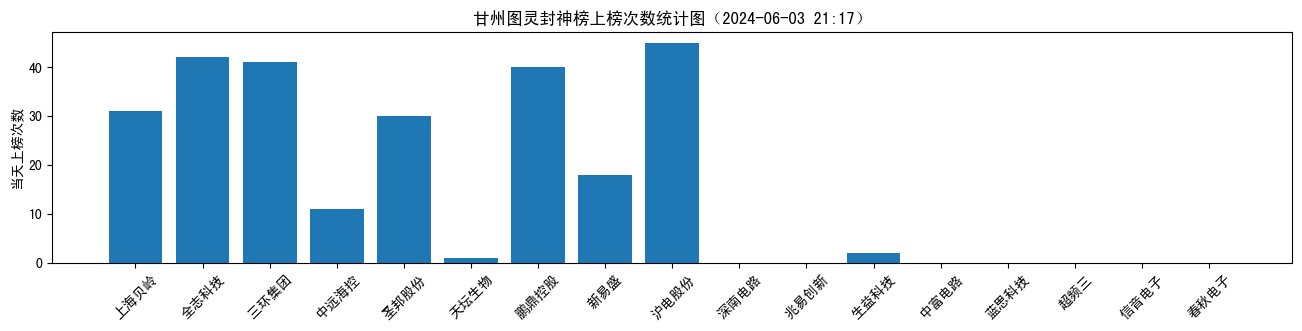

In [26]:



# 绘制柱状图
fig1 = plt.figure(figsize=(16, 3))
plt.bar(df_all['股票名称'], df_all['cumcount'])

# 添加标题和标签
plt.title(f'甘州图灵封神榜上榜次数统计图（{current_time}）')
# plt.xlabel('Category')
plt.ylabel('当天上榜次数')
# 显示图例
plt.xticks(rotation=45) 
# ax2.legend()

# # 优化label显示,非必须
# plt.autofmt_xdate()
# fig2.autofmt_xdate()
# 显示图表
plt.show()

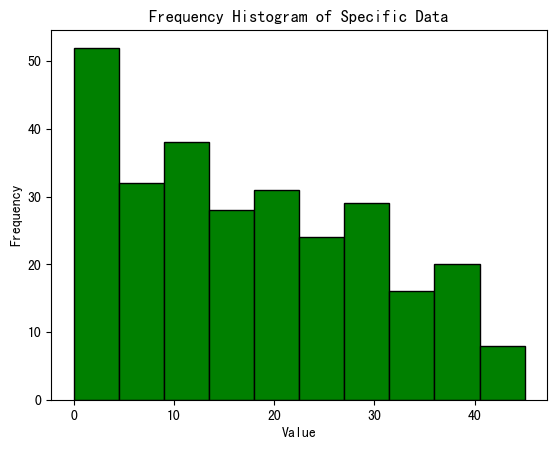

In [20]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]  # 具体的观测值列表
data = df_all['cumcount'].to_list()
plt.hist(data, bins='auto', color='green', edgecolor='black')
# 其他绘图设置保持不变
plt.title('Frequency Histogram of Specific Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Hour'>

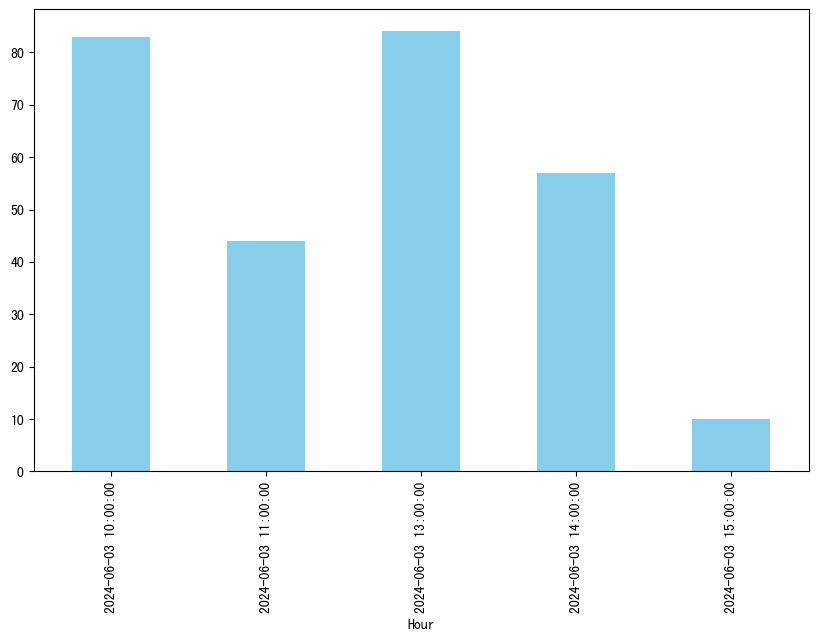

In [21]:
# 将时间分为时段，例如每小时
df_all['Hour'] = df_all.index.floor('H')  # 按小时分段
# print(df_all)

# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
time_segment_counts.plot(kind='bar', color='skyblue')  # 绘制柱状图

<Axes: xlabel='Hour'>

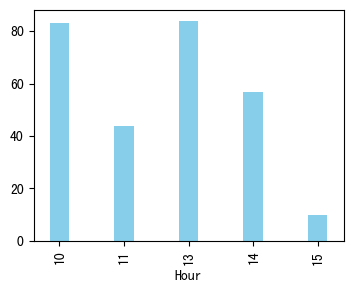

In [22]:
# 将时间分为时段，例如按小时
# df_all.index = df_all.index.normalize()  # 将时间戳转换为00:00:00的日期

# 创建一个时间段作为分组的依据，例如每小时
df_all['Hour'] = df_all.index.map(lambda x: x.hour)
# print(df_all )
# 将时间分为时段，例如每小时
# df_all['Hour'] = df_all.index.floor('H')  # 按小时分段
# print(df_all)

# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(4, 3))  # 设置图形大小
time_segment_counts.plot(kind='bar', width=0.3, color='skyblue')  # 绘制柱状图

In [46]:
def get_stock_market(stock_code):
    if stock_code.startswith(('60', '68')):
        return "SH"
    elif stock_code.startswith(('0', '3')):
        return "SZ"
    elif stock_code.startswith(('4', '8')):
        return "BJ"
    else:
        return "Unknown"

In [63]:
stock_code ='300379' # df_all[:1]['股票代码'].to_list()[0]
venue = get_stock_market(stock_code)


In [23]:
df_em = ak.stock_zh_a_spot_em()
# print(df_em)
# 指定要重命名的列和新列名
new_column_names = {'代码': '股票代码', '名称': '股票名称'}

# 使用rename方法重命名列
df_renamed = df_em.rename(columns=new_column_names)

df_today = df_renamed[['股票代码','股票名称','最新价', '涨跌幅']]
df_today

,股票代码,股票名称,最新价,涨跌幅
0,920002,万达轴承,72.00,20.24
1,300822,贝仕达克,14.68,20.03
2,301176,逸豪新材,14.69,20.02
3,301306,西测测试,49.02,20.00
4,300563,神宇股份,30.30,20.00
...,...,...,...,...
5607,300300,ST峡创,1.21,-19.87
5608,300125,ST聆达,1.68,-20.00
5609,300117,*ST嘉寓,0.72,-20.00
5610,300175,朗源股份,8.11,-20.02


In [24]:
merged_df = df_first_occurrence.merge(df_today, on='股票代码', how='left', suffixes=('_df1', '_df2'))
merged_df['浮盈']=round(100 * ( merged_df['最新价'] - merged_df['现价']) / merged_df['现价'],2)
merged_df

,上榜时间,股票代码,股票名称_df1,现价,涨跌幅_df1,成交额,上榜涨幅,榜间涨幅,open,high,low,close,日收益率,股票名称_df2,最新价,涨跌幅_df2,浮盈
0,2024-06-03 10:03:36,600171,上海贝岭,16.98,1.98,102894.35,0.06,0.06,16.00,17.25,15.83,16.78,-1.18,上海贝岭,16.78,0.78,-1.18
1,2024-06-03 10:03:36,300458,全志科技,21.62,4.19,49575.76,0.05,0.05,20.66,21.88,20.48,21.46,-0.74,全志科技,21.46,3.42,-0.74
2,2024-06-03 10:03:36,300408,三环集团,29.67,1.99,6594.01,0.00,0.00,29.25,29.75,28.97,29.42,-0.84,三环集团,29.42,1.13,-0.84
3,2024-06-03 10:03:36,601919,中远海控,15.92,5.85,184355.41,0.26,0.00,15.44,16.19,15.41,16.06,0.88,中远海控,16.06,6.78,0.88
4,2024-06-03 10:03:36,300661,圣邦股份,79.45,2.42,6165.21,-0.16,-0.16,77.25,79.95,77.25,78.95,-0.63,圣邦股份,78.95,1.78,-0.63
5,2024-06-03 10:13:37,600161,天坛生物,30.47,7.52,38534.33,0.00,0.04,28.76,30.55,28.43,30.07,-1.31,天坛生物,30.07,6.10,-1.31
6,2024-06-03 10:13:37,002938,鹏鼎控股,30.28,1.27,16879.39,0.00,0.00,29.69,30.76,29.58,30.19,-0.30,鹏鼎控股,30.19,0.97,-0.30
7,2024-06-03 10:13:37,300502,新易盛,93.17,7.43,193972.28,-0.12,-0.03,88.00,96.99,87.90,95.35,2.34,新易盛,95.35,9.94,2.34
8,2024-06-03 10:18:12,002463,沪电股份,33.13,6.02,110876.11,0.00,0.00,31.30,34.28,31.30,33.45,0.97,沪电股份,33.45,7.04,0.97
9,2024-06-03 10:32:24,002916,深南电路,97.33,8.23,42599.67,0.00,0.00,90.01,97.38,90.01,93.90,-3.52,深南电路,93.90,4.41,-3.52


## 成交额排名前100的股票的涨幅直方图

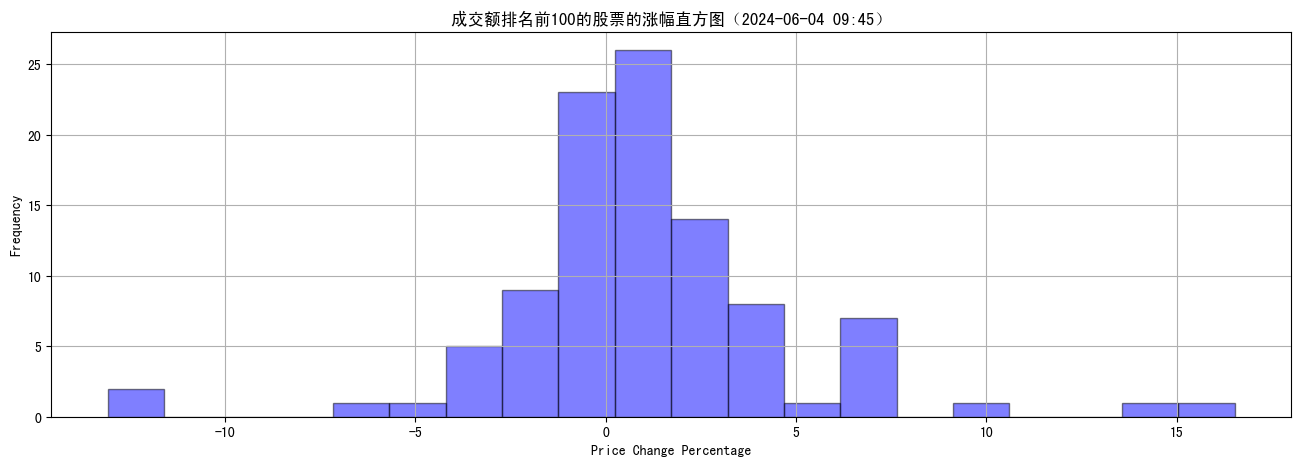

In [43]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# 使用akshare获取成交额排名前100的股票数据
top100_stocks = ak.stock_zh_a_spot_em()

# 对股票按照成交额进行降序排序，并筛选出前100名的股票代码
top100_stocks = top100_stocks.sort_values(by='成交额',ascending=False).head(100)
# 提取股票代码和涨跌幅
# 假设top100_stocks是一个DataFrame，其中包含'代码'和'涨跌幅'列
# 这里需要根据实际返回的数据结构进行调整
stock_codes = top100_stocks['代码'].values
pct_changes = top100_stocks['涨跌幅'].values

# 由于股票代码和涨跌幅是数值型的，我们需要将股票代码转换为字符串
stock_str_codes = [str(code) for code in stock_codes]

# 创建一个新的DataFrame来存储股票代码和涨跌幅
df = pd.DataFrame({'股票代码': stock_str_codes, '涨跌幅': pct_changes})

# 绘制涨幅直方图
plt.figure(figsize=(16, 5))
hist_data = plt.hist(df['涨跌幅'], bins=20, alpha=0.5, color='blue', edgecolor='black')

# 添加标题和标签
plt.title(f'成交额排名前100的股票的涨幅直方图（{current_time}）')
plt.xlabel('Price Change Percentage')
plt.ylabel('Frequency')
plt.grid(True)

# 显示图形

plt.show()


# 用akshare的stock_zh_a_spot_em接口获取数据，绘制成交额排名前100的股票的涨幅直方图，给我写出工程化程度最高的实现代码

In [51]:
bin_heights,bin_edges,_ = hist_data

In [68]:
import numpy as np

def generate_weights(num_elements, base=2):
    # 创建一个长度为num_elements的数组
    weights = np.zeros(num_elements)
    
    # 设置中间权重为最小值
    weights[num_elements // 2] = 1
    
    # 填充两边的权重，以指数级递增
    for i in range(1, num_elements // 2):
        # 左边的权重
        weights[num_elements // 2 - i] = base ** (-i)
        # 右边的权重
        if num_elements // 2 + i < num_elements:
            weights[num_elements // 2 + i] = base ** (-i)
    
    # 归一化权重，使它们的总和为1
    weights /= np.sum(weights)
    
    return weights

# 生成20个元素的权重数组
weights = generate_weights(20)

# 打印权重数组
print(weights)

[0.         0.00065189 0.00130378 0.00260756 0.00521512 0.01043025
 0.0208605  0.04172099 0.08344198 0.16688396 0.33376793 0.16688396
 0.08344198 0.04172099 0.0208605  0.01043025 0.00521512 0.00260756
 0.00130378 0.00065189]


In [69]:
print("边界值:", bin_edges)
print("边界值:", sum(bin_edges),len(bin_edges))

# bin_heights是每个直方图柱的高度
print("高度:", bin_heights)
print("高度:", sum(bin_heights),len(bin_heights))
weights = generate_weights(20)
print(weights)

边界值: [-13.09  -11.609 -10.128  -8.647  -7.166  -5.685  -4.204  -2.723  -1.242
   0.239   1.72    3.201   4.682   6.163   7.644   9.125  10.606  12.087
  13.568  15.049  16.53 ]
边界值: 36.120000000000026 21
高度: [ 2.  0.  0.  0.  1.  1.  5.  9. 23. 26. 14.  8.  1.  7.  0.  1.  0.  0.
  1.  1.]
高度: 100.0 20
[0.         0.00065189 0.00130378 0.00260756 0.00521512 0.01043025
 0.0208605  0.04172099 0.08344198 0.16688396 0.33376793 0.16688396
 0.08344198 0.04172099 0.0208605  0.01043025 0.00521512 0.00260756
 0.00130378 0.00065189]


In [71]:
msi = (bin_heights * weights)
print(msi)
msi = (bin_heights * weights).mean()

msi_max = (bin_heights * weights).max()
msi_min = (bin_heights * weights).min()
print(msi,  msi_min, msi_max)
# 归一化 MSI 到 [0, 1]
msi_normalized = (msi - msi_min) / (msi_max - msi_min)
print(msi_normalized)
# 调整到 [-1, 1] 区间
normalized_msi = 2 * msi_normalized - 1

print(f"归一化市场强弱指数（MSI）: {normalized_msi:.2f}")

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.21512386e-03 1.04302477e-02 1.04302477e-01 3.75488918e-01
 1.91916558e+00 4.33898305e+00 4.67275098e+00 1.33507171e+00
 8.34419817e-02 2.92046936e-01 0.00000000e+00 1.04302477e-02
 0.00000000e+00 0.00000000e+00 1.30378096e-03 6.51890482e-04]
0.657464146023468 0.0 4.672750977835723
0.14070172991071428
归一化市场强弱指数（MSI）: -0.72


      股票代码    涨跌幅
25  300552  19.99
14  300641  13.57
92  300040  10.09
81  600312  10.04
29  601179  10.03
..     ...    ...
86  300563  -4.29
44  600188  -4.94
80  301550  -5.07
67  601933  -5.88
61  300290  -6.51

[100 rows x 2 columns]
0      7.0
1      5.0
2      6.0
3      6.0
4      5.0
      ... 
95     5.0
96     3.0
97     6.0
98     5.0
99    12.0
Name: 涨跌幅, Length: 100, dtype: float64
区间边界: [-6.51  -5.185 -3.86  -2.535 -1.21   0.115  1.44   2.765  4.09   5.415
  6.74   8.065  9.39  10.715 12.04  13.365 14.69  16.015 17.34  18.665
 19.99 ]
每个区间的平均涨跌幅:
 涨跌幅
0.0     -5.880000
1.0     -4.522000
2.0     -3.010000
3.0     -2.116667
4.0     -0.391667
5.0      0.723448
6.0      1.796364
7.0      3.455455
8.0      4.635000
9.0      6.172500
10.0     7.180000
11.0     8.780000
12.0    10.018000
15.0    13.570000
19.0    19.990000
Name: 涨跌幅, dtype: float64
0.0      1
1.0      5
2.0      5
3.0      6
4.0     12
5.0     29
6.0     11
7.0     11
8.0      6
9.0      4
10.0     1
11.0     

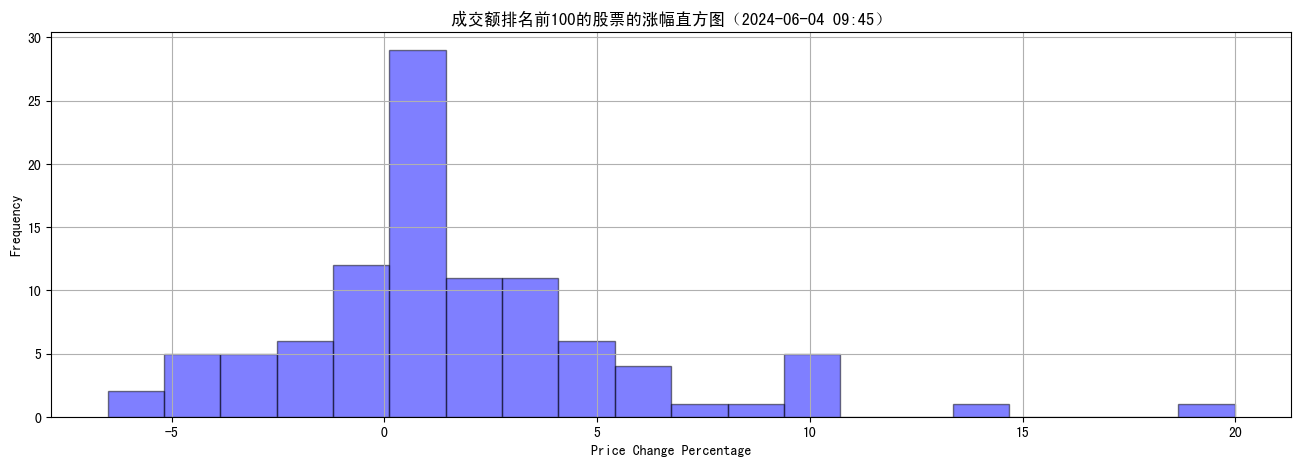

[(2.0, -6.51, -0.05355820649938296), (5.0, -5.185, -0.04265734265734265), (5.0, -3.86, -0.031756478815302344), (6.0, -2.535, -0.02085561497326203), (12.0, -1.21, -0.009954751131221719), (29.0, 0.115, 0.0009461127108185932), (11.0, 1.44, 0.011846976552858905), (11.0, 2.765, 0.022747840394899216), (6.0, 4.09, 0.033648704236939525), (4.0, 5.415, 0.04454956807897984), (1.0, 6.74, 0.05545043192102015), (1.0, 8.065, 0.06635129576306045), (5.0, 9.39, 0.07725215960510078), (0.0, 10.715, 0.08815302344714109), (0.0, 12.04, 0.0990538872891814), (1.0, 13.365, 0.10995475113122172), (0.0, 14.69, 0.12085561497326201), (0.0, 16.015, 0.13175647881530234), (0.0, 17.34, 0.14265734265734265), (1.0, 18.665, 0.15355820649938295)]
0.041793500617030035 -0.21328671328671328 0.3862607980255039
归一化市场强弱指数（MSI,【-1,1】）: -0.15


In [126]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

def generate_weights(num_elements, base=2):
    # 创建一个长度为num_elements的数组
    weights = np.zeros(num_elements)
    
    # 确保base的值大于1，以便权重可以指数递增
    if base <= 1:
        raise ValueError("Base must be greater than 1 for exponential increase.")
    
    # 设置中间权重为最小值
    weights[num_elements // 2] = 1 / num_elements
    
    # 填充两边的权重，以指数级递增
    increment = 1  # 从1开始递增
    for i in range(1, num_elements // 2 + 1):
        # 左边的权重
        weights[num_elements // 2 - i] = increment * (1 / num_elements)
        # 右边的权重
        weights[num_elements // 2 + i - 1] = increment * (1 / num_elements)
        increment *= base  # 指数递增
    
    # 归一化
    weights /= np.sum(weights)
    return weights

# 使用akshare获取成交额排名前100的股票数据
top100_stocks = ak.stock_zh_a_spot_em()

# 对股票按照成交额进行降序排序，并筛选出前100名的股票代码
top100_stocks = top100_stocks.sort_values(by='成交额',ascending=False).head(100)
# 提取股票代码和涨跌幅
# 假设top100_stocks是一个DataFrame，其中包含'代码'和'涨跌幅'列
# 这里需要根据实际返回的数据结构进行调整
stock_codes = top100_stocks['代码'].values
pct_changes = top100_stocks['涨跌幅'].values

# 由于股票代码和涨跌幅是数值型的，我们需要将股票代码转换为字符串
stock_str_codes = [str(code) for code in stock_codes]

# 创建一个新的DataFrame来存储股票代码和涨跌幅
df = pd.DataFrame({'股票代码': stock_str_codes, '涨跌幅': pct_changes})

df_sorted = df.sort_values(by='涨跌幅', ascending=False)
print(df_sorted)

min_change = df['涨跌幅'].min()
max_change = df['涨跌幅'].max()
bins = np.linspace(min_change, max_change, num=21)

# intervals = pd.qcut(df['涨跌幅'], q=20, labels=False)
intervals = pd.cut(df['涨跌幅'], bins=bins, right=True, labels=False)
print(intervals)
average_change_per_interval = df.groupby(intervals)['涨跌幅'].mean()

print("区间边界:", bins)
print("每个区间的平均涨跌幅:\n", average_change_per_interval)

# 统计每个区间的股票个数
stock_count_per_interval = intervals.value_counts().sort_index()
# 打印结果
print(stock_count_per_interval)

# 绘制涨幅直方图
plt.figure(figsize=(16, 5))
hist_data = plt.hist(df['涨跌幅'], bins=20, alpha=0.5, color='blue', edgecolor='black')

# 添加标题和标签
plt.title(f'成交额排名前100的股票的涨幅直方图（{current_time}）')
plt.xlabel('Price Change Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

bin_heights,bin_edges,_ = hist_data
bin_edges =[round(item,4) for item in bin_edges]
weights = [item for item in bin_edges][:-1]
weights /= np.sum(weights)

ll = list(zip(bin_heights,bin_edges,weights))
print(ll)

msi_max = (bin_heights * weights).max()
msi_min = (bin_heights * weights).min()
msi = (bin_heights * weights).mean()
print(msi,msi_min,msi_max)
# 归一化 MSI 到 [0, 1]
msi_normalized = (msi - msi_min) / (msi_max - msi_min)
# 调整到 [-1, 1] 区间
normalized_msi = 2 * msi_normalized - 1

print(f"归一化市场强弱指数（MSI,【-1,1】）: {normalized_msi:.2f}")


In [77]:
def generate_weights(num_elements, base=2):
    # 创建一个长度为num_elements的数组
    weights = np.zeros(num_elements)    
    # 设置中间权重为最小值
    weights[num_elements // 2] = 1
    
    # 填充两边的权重，以指数级递增
    for i in range(1, num_elements // 2):
        # 左边的权重
        weights[num_elements // 2 - i] = base ** (-i)
        # 右边的权重
        if num_elements // 2 + i < num_elements:
            weights[num_elements // 2 + i] = base ** (-i)
    
    # 归一化权重，使它们的总和为1
    weights /= np.sum(weights)    
    return weights

weights = generate_weights(20)
print(weights)


array([0.        , 0.00065189, 0.00130378, 0.00260756, 0.00521512,
       0.01043025, 0.0208605 , 0.04172099, 0.08344198, 0.16688396,
       0.33376793, 0.16688396, 0.08344198, 0.04172099, 0.0208605 ,
       0.01043025, 0.00521512, 0.00260756, 0.00130378, 0.00065189])

In [89]:
import numpy as np

def generate_weights(num_elements, base=2):
    # 创建一个长度为num_elements的数组
    weights = np.zeros(num_elements)
    
    # 确保base的值大于1，以便权重可以指数递增
    if base <= 1:
        raise ValueError("Base must be greater than 1 for exponential increase.")
    
    # 设置中间权重为最小值
    weights[num_elements // 2] = 1 / num_elements
    
    # 填充两边的权重，以指数级递增
    increment = 1  # 从1开始递增
    for i in range(1, num_elements // 2 + 1):
        # 左边的权重
        weights[num_elements // 2 - i] = increment * (1 / num_elements)
        # 右边的权重
        weights[num_elements // 2 + i - 1] = increment * (1 / num_elements)
        increment *= base  # 指数递增
    
    # 归一化
    weights /= np.sum(weights)
    return weights
# 生成20个元素的权重数组
weights = generate_weights(20)
print(weights)
print(sum(weights))

[0.25024438 0.12512219 0.06256109 0.03128055 0.01564027 0.00782014
 0.00391007 0.00195503 0.00097752 0.00048876 0.00048876 0.00097752
 0.00195503 0.00391007 0.00782014 0.01564027 0.03128055 0.06256109
 0.12512219 0.25024438]
0.9999999999999999


In [216]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

def generate_weights(num_elements, base=2):
    # 创建一个长度为num_elements的数组
    weights = np.zeros(num_elements)
    
    # 确保base的值大于1，以便权重可以指数递增
    if base <= 1:
        raise ValueError("Base must be greater than 1 for exponential increase.")
    
    # 设置中间权重为最小值
    weights[num_elements // 2] = 1 / num_elements
    
    # 填充两边的权重，以指数级递增
    increment = 1  # 从1开始递增
    for i in range(1, num_elements // 2 + 1):
        # 左边的权重
        weights[num_elements // 2 - i] = increment * (1 / num_elements)
        # 右边的权重
        weights[num_elements // 2 + i - 1] = increment * (1 / num_elements)
        increment *= base  # 指数递增
    
    # 归一化
    weights /= np.sum(weights)
    return weights

# 使用akshare获取成交额排名前100的股票数据
top100_stocks = ak.stock_zh_a_spot_em()

# 对股票按照成交额进行降序排序，并筛选出前100名的股票代码
top100_stocks = top100_stocks.sort_values(by='成交额',ascending=False).head(100)
# print(top100_stocks)
amount = top100_stocks['成交额'].sum()
top100_stocks['涨跌幅']=top100_stocks['涨跌幅'] 
top100_stocks['加权涨跌幅'] = (top100_stocks['涨跌幅'] / 100)  * top100_stocks['成交额']
top100_stocks['贡献'] = top100_stocks['加权涨跌幅'] / amount * 100
print(top100_stocks[['名称','涨跌幅','成交额','加权涨跌幅','贡献']])
MSI =1 * top100_stocks['加权涨跌幅'].sum() / top100_stocks['成交额'].sum()
print(f"市场强弱指数（MSI）: {MSI: .2}")


        名称   涨跌幅           成交额         加权涨跌幅        贡献
317   中远海控  3.24  4.313858e+09  1.397690e+08  0.085488
1703   比亚迪  0.44  3.744672e+09  1.647656e+07  0.010078
768   宁德时代  1.71  3.639806e+09  6.224068e+07  0.038069
399   中际旭创  2.76  3.530989e+09  9.745529e+07  0.059607
1315  贵州茅台  0.84  3.432497e+09  2.883298e+07  0.017635
...    ...   ...           ...           ...       ...
920   中国建筑  1.43  1.001361e+09  1.431946e+07  0.008758
4044  高新发展 -2.03  1.000757e+09 -2.031537e+07 -0.012426
911   滨江集团  1.44  9.993435e+08  1.439055e+07  0.008802
1893  格力电器  0.24  9.961178e+08  2.390683e+06  0.001462
40    供销大集  9.95  9.951984e+08  9.902224e+07  0.060566

[100 rows x 5 columns]
市场强弱指数（MSI）:  0.017


In [ ]:

# # 由于股票代码和涨跌幅是数值型的，我们需要将股票代码转换为字符串
# stock_str_codes = [str(code) for code in stock_codes]

# # 创建一个新的DataFrame来存储股票代码和涨跌幅
# df = pd.DataFrame({'股票代码': stock_str_codes, '涨跌幅': pct_changes})

# min_change = df['涨跌幅'].min()
# max_change = df['涨跌幅'].max()
# bins = np.linspace(min_change, max_change, num=21)

# intervals = pd.cut(df['涨跌幅'], bins=bins, right=True, labels=False)

# # 统计每个区间的股票个数和平均涨幅
# stock_count_per_interval = intervals.value_counts().sort_index()
# average_change_per_interval = df.groupby(intervals)['涨跌幅'].mean()
# # amount_per_interval = df.groupby(intervals)['成交额'].sum()
# # print(type(average_change_per_interval))
# # print(average_change_per_interval)
# # average_change_per_interval.iloc[:5] += -5
# # average_change_per_interval.iloc[-5:] += 10
# # print(average_change_per_interval)

# # average_change_per_interval = [round(item,4) for item in average_change_per_interval]
# weights = [item for item in average_change_per_interval ] 
# # weights /= np.sum(weights)
# print(weights * amount_per_interval)
# # ll = list(zip(stock_count_per_interval,average_change_per_interval,weights))
# # print(ll)

# # 计算加权股票数
# weighted_stocks = stock_count_per_interval* weights

# MSI = sum(weighted_stocks) / 100

# # MSI =(2 * MSI) - 1

# print(f"市场强弱指数（MSI）: {MSI}")



In [14]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import time
from IPython.display import clear_output

def msi():
  # 使用akshare获取成交额排名前100的股票数据
  top100_stocks = ak.stock_zh_a_spot_em()

  # 对股票按照成交额进行降序排序，并筛选出前100名的股票代码
  top100_stocks = top100_stocks.sort_values(by='成交额',ascending=False).head(100)
  # print(top100_stocks)
  amount = top100_stocks['成交额'].sum()
  top100_stocks['涨跌幅']=top100_stocks['涨跌幅'] 
  top100_stocks['加权涨跌幅'] = (top100_stocks['涨跌幅'] / 100)  * top100_stocks['成交额']
  top100_stocks['贡献'] = top100_stocks['加权涨跌幅'] / amount * 100
  # print(top100_stocks[['名称','涨跌幅','成交额','加权涨跌幅','贡献']])
  MSI =100 * round (top100_stocks['加权涨跌幅'].sum() / top100_stocks['成交额'].sum(),3)
  print(f"市场强弱指数（MSI）: {MSI}")
  return MSI


try:
    while True:
        # clear_output(wait=True)  # 清除之前的输出
        print(msi())
        time.sleep(3)  # 每10秒更新一次
except KeyboardInterrupt:
    pass  # 按 Ctrl+C 时退出循环
 

1.7000000000000002
1.7000000000000002
1.7000000000000002
1.7000000000000002
1.7000000000000002
1.7000000000000002
1.7000000000000002
1.7000000000000002
1.7000000000000002
